# PCA Principal component analysis

<img src="https://cdn-media-1.freecodecamp.org/images/1*ldDA-9rCN_gG3qaMzIA6fA.png">

In [5]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

### Análise exploratória

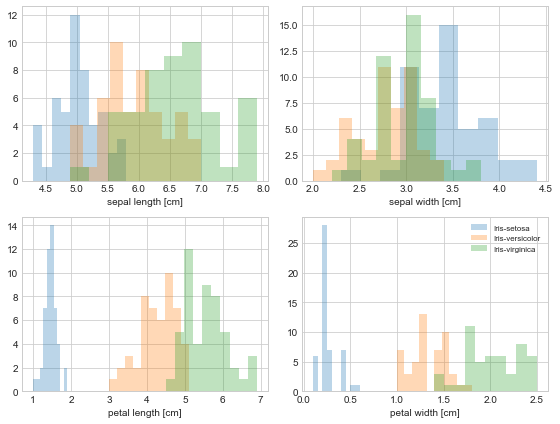

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

### Normalização dos dados

A padronização dos dados antes de um PCA na matriz de covariância depende das escalas de medida dos recursos originais. Como o PCA produz um subespaço de características que maximiza a variância ao longo dos eixos, faz sentido padronizar os dados, especialmente se ele foi medido em escalas diferentes. Embora todos os recursos do conjunto de dados Iris tenham sido medidos em centímetros, continuamos com a transformação dos dados em escala unitária (média = 0 e variância = 1), o que é um requisito para o desempenho ideal de muitos algoritmos de aprendizado de máquina.

In [8]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

<img src="https://miro.medium.com/max/700/1*Qxyo-uDrmsUzdxIe7Nnsmg.png">

### Então, quais são as etapas para fazer o PCA funcionar? Como aplicamos a magia?
 - Pegue o conjunto de dados no qual você deseja aplicar o algoritmo.
 - Calcule a matriz de covariância.
 - Calcule os autovetores e seus autovalores.
 - Classifique os autovetores de acordo com seus autovalores em ordem decrescente.
 - Escolha os primeiros autovetores K (onde k é a dimensão com a qual gostaríamos de terminar).
 - Construa novo conjunto de dados reduzido.
 
### Parece complexo! Mas é seu dia de sorte, o sklearn já tem implementado e você só precisa falar o número de componentes para ele!

In [9]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

<img src="https://qph.fs.quoracdn.net/main-qimg-529165b6437e913f5a1aa7cb84e47dc6">

<img src="https://miro.medium.com/max/700/1*7jUCr36YguAMKNHTN4Gt8A.png">

### Agora vamos plotar as componentes e ver como está distribuido a variável target desse dataset

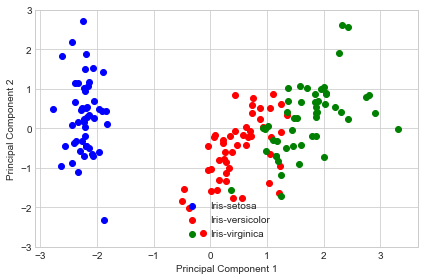

In [10]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()